# Analysis on the sleep habits
*This project will be updated once I will finish with the QBR decks I need to deliver.*


## Introduction

There is a set of data collected regarding the sleep quality and habits of people. 

The is very small in order to draw any significant results, but it is a fun project to improve my Python skills and start learning hypothesis testing with [chi squared tests](!https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test).

The data has the following columns:
- `Timestamp`: date and time when the answer was received/ submitted
- `How many hours of sleep do you think you get a night on average?`: average number of hours slept/night by participant
- `Do you feel like you have quality sleep?`: the quality of sleep. 
- `What type of person are you?`: 
- `Routine or Freestyle`: if the participant has a routine before going to sleep or not
- `Just before falling asleep`: habits before falling asleep
- `LifeStage`: w/ or w/o kids
- `Region`: Americas or EMEA
- `When was the last time you replaced your matress?`

Apart from average hours of sleep, all the other columns have categorical values. My aim is to try to find a correlation between these factors that influence the quality of sleep and the number of hours a person sleeps.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2


# draw plots inline
%matplotlib inline

# set global default font sizes for plots
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize']= 13
plt.rcParams['ytick.labelsize']= 13

# set top-level seaborn styles
sns.set_style("dark")
sns.set_palette("deep")

# centre-align all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [2]:
# storing the data as a dataframe
sleep_data = pd.read_csv("Parker Sleep Analysis - Form Responses 1.csv")

## Data inspection

This section is dedicated towards cleaning the data and making it easier to work with

In [3]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Timestamp                                                         60 non-null     object
 1   How many hours of sleep do you think you get a night on average?  60 non-null     object
 2   Do you feel like you have quality sleep?                          60 non-null     object
 3   What type of person are you?                                      58 non-null     object
 4   Routine or Freestyle                                              60 non-null     object
 5   Just before falling asleep                                        60 non-null     object
 6   LifeStage                                                         60 non-null     object
 7   Region                                         

We have a total of 60 answers. Not many, but still let's see what we can get out of it.

As mentioned, the survey stores mainly categorical data.


### Working with missing values

The good part is that the majority of the data is complete. The column `What type of person are you?` seems to have two missing values. It might have been a submission error or the person did not fill in the data during the survey. That will be fixed just below by adding the most commong value instead of the `NaN` values

In [4]:
sleep_data = sleep_data.fillna(sleep_data['What type of person are you?'].value_counts().index[0])

In [5]:
sleep_data["What type of person are you?"].value_counts()

Night Owl (stay up late, wake up late)         34
Early Bird (in bed early, up with the lark)    26
Name: What type of person are you?, dtype: int64

### Cleaning the column names and renaming values

I will drop the `Timestamp` column because it is irrelevant to the study I want to make.

In [6]:
sleep_data = sleep_data.drop("Timestamp", axis=1)

In [7]:
# renaming the columns for a better accessibility
sleep_data = sleep_data.rename(columns= {
    "How many hours of sleep do you think you get a night on average?": "Hours of sleep",
    "Do you feel like you have quality sleep?": "Sleep Quality",
    "What type of person are you?": "Type of person",
    "Just before falling asleep": "Before sleeping",
    "When was the last time you replaced your matress?": "Matress replaced"
})

In [8]:
sleep_data

,Hours of sleep,Sleep Quality,Type of person,Routine or Freestyle,Before sleeping,LifeStage,Region,Matress replaced
0,7 Hours,"It's ok, it could be better","Early Bird (in bed early, up with the lark)",It depends on what i'm doing or how deep i'm into a Netflix boxset,Total Silence,Baby or Toddlers In the home,EMEA,1-3 years
1,Less than 6 hours,"It's ok, it could be better","Early Bird (in bed early, up with the lark)",It depends on what i'm doing or how deep i'm into a Netflix boxset,I read,Grown Up Kids (7+ through to teenagers),Americas,Can't remember
2,8 Hours,"It's ok, it could be better","Early Bird (in bed early, up with the lark)",I have a time I always go to bed,I listen to the radio/podcast/music,No Kids,EMEA,Can't remember
3,7 Hours,"Yes, I wake up fresh as a daisy every morning","Night Owl (stay up late, wake up late)",It depends on what i'm doing or how deep i'm into a Netflix boxset,Go down my phone,Grown Up Kids (7+ through to teenagers),EMEA,1-3 years
4,7 Hours,"It's ok, it could be better","Night Owl (stay up late, wake up late)",I have a time I always go to bed,Total Silence,No Kids,EMEA,1-3 years
5,7 Hours,"It's ok, it could be better","Night Owl (stay up late, wake up late)",It depends on what i'm doing or how deep i'm into a Netflix boxset,Go down my phone,Baby or Toddlers In the home,EMEA,Can't remember
6,7 Hours,"It's ok, it could be better","Early Bird (in bed early, up with the lark)",I have a time I always go to bed,Total Silence,Grown Up Kids (7+ through to teenagers),EMEA,Can't remember
7,7 Hours,No,"Early Bird (in bed early, up with the lark)",I have a time I always go to bed,I read,No Kids,EMEA,1-3 years
8,7 Hours,"It's ok, it could be better","Night Owl (stay up late, wake up late)",It depends on what i'm doing or how deep i'm into a Netflix boxset,Total Silence,Baby or Toddlers In the home,EMEA,Can't remember
9,8 Hours,"It's ok, it could be better","Night Owl (stay up late, wake up late)",It depends on what i'm doing or how deep i'm into a Netflix boxset,I read,Baby or Toddlers In the home,EMEA,In the last 12 months


### Modifying the values in the columns

The newly nameed column `Hours of sleep` contains values that are important for plotting some graphs. Therefore, I will prep and clean the data. For the answer `Less than 6 hours` I chose a value of `5.5` in order to account for what actually the options says. Also, some people may be sleeping 6 hours, others 5 hours. Though it might be hard for someone who sleeps on average less than 6 hours would be ok in the [long run](!https://www.safetyandhealthmagazine.com/articles/19519-average-nights-sleep-now-less-than-six-hours-survey-shows#:~:text=The%20respondents%20also%20reported%20more%20%E2%80%9Cterrible%E2%80%9D%20nights%20of%20sleep%20last%20year%2C%20averaging%20105%20%E2%80%93%20up%20from%2099%20in%202018.%20The%20average%20respondent%20reported%20getting%20120%20nights%20of%20%E2%80%9Cgreat%E2%80%9D%20sleep%2C%20defined%20as%20falling%20asleep%20right%20away%20and%20sleeping%20through%20the%20night)

For the column `Routine or Freestyle`, I decided to shorten the answers just because it's easier when the data will be plotted.

In [9]:
hours_map = {
    "7 Hours": 7,
    "Less than 6 hours": 5.5,
    "8 Hours": 8,
    "9 Hours": 9
}

sleep_data["Hours of sleep"] = sleep_data["Hours of sleep"].map(hours_map)


In [10]:
routine_style_map= {
    "It depends on what i'm doing or how deep i'm into a Netflix boxset": "Freestyle",
    "I have a time I always go to bed": "Routine"
}

sleep_data["Routine or Freestyle"] = sleep_data["Routine or Freestyle"].map(routine_style_map)

## Visualizing the data and correlations

Also because it is really late now, and probably I will continue working on this funny project in the weekend if I finish the QBR on time, I will start plotting the data right away.

I will be looking mainly at how some of the columns correlate between them. And hopefully finish with a nice heatmap based on the chi squared tests.

*NOTE: I initially transformed the categorical data in a numeric data and did a Pearson correlation. Then after carefully inspecting again the conditions for a Pearson (works better with numerical values), I turned towards chi^2 tests.* 

## Sleep quality and the hours of sleep

As it can be seen below, it is clear that people who answered with `No` which means a very bad sleep quality are also the ones who, on average, get less sleep. Between the other two answers there is little difference. 

In [11]:
sleep_quality = sleep_data.pivot_table(values= "Hours of sleep", index= "Sleep Quality", aggfunc=np.mean)
sleep_quality

,Hours of sleep
Sleep Quality,
"It's ok, it could be better",7.075
No,6.350
"Yes, I wake up fresh as a daisy every morning",7.150


<AxesSubplot:title={'center':'Average hours for the quality of sleep'}, ylabel='Sleep Quality'>

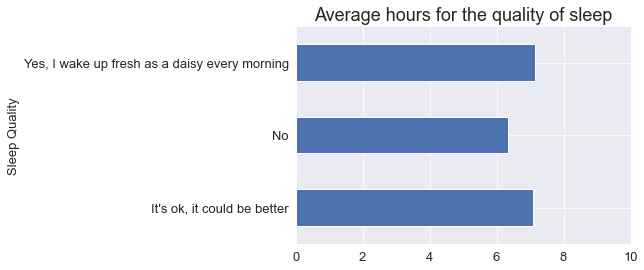

In [12]:
sleep_quality.plot(kind="barh", xlim=(0,10), title="Average hours for the quality of sleep", legend= False, grid=True)

## Habits before sleeping

The results indicate that the respondents who tent to use listen to a radio/podcast/music before going bed are the ones who reported also sleeping the most hours. At the same time, they are not fully satisfied with the quality of their sleep when the data is combined with the `Sleep quality` column

In [13]:
sleep_quality = sleep_data.pivot_table(values= "Hours of sleep", index= ["Before sleeping"], aggfunc=np.mean)
sleep_quality

,Hours of sleep
Before sleeping,
Go down my phone,6.740741
I listen to the radio/podcast/music,7.583333
I read,7.000000
Total Silence,7.107143


In [14]:
sleep_quality_habit = sleep_data.pivot_table(values= "Hours of sleep", index= ["Sleep Quality","Before sleeping"], aggfunc=np.mean)
sleep_quality_habit

Hours of sleep
Sleep Quality                                 Before sleeping                                    
It's ok, it could be better                   Go down my phone                           6.794118
                                              I listen to the radio/podcast/music        8.000000
                                              I read                                     7.055556
                                              Total Silence                              7.111111
No                                            Go down my phone                           6.600000
                                              I listen to the radio/podcast/music        5.500000
                                              I read                                     6.250000
                                              Total Silence                              6.250000
Yes, I wake up fresh as a daisy every morning Go down my phone                           6.700000
                                              I read                                     7.500000
                                              Total Silence                              7.666667

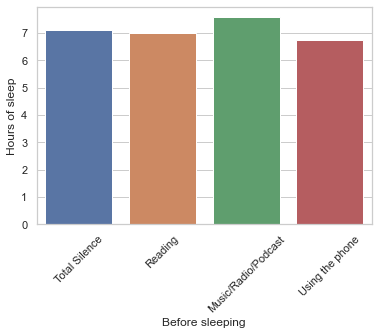

In [15]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Before sleeping', y='Hours of sleep', data=sleep_data, ci=None, )
ax.set_xticklabels(["Total Silence", "Reading", "Music/Radio/Podcast", "Using the phone"])
ax.tick_params(axis='x', rotation=45)

In [16]:
lifestage_sleep_quality = sleep_data.pivot_table(values= "Hours of sleep", index= ["LifeStage", "Matress replaced"], aggfunc=np.mean)
lifestage_sleep_quality

Hours of sleep
LifeStage                               Matress replaced                     
Baby or Toddlers In the home            1-3 years                    6.500000
                                        Can't remember               6.400000
                                        In the last 12 months        7.333333
Grown Up Kids (7+ through to teenagers) 1-3 years                    6.500000
                                        Can't remember               6.600000
                                        In the last 12 months        7.000000
No Kids                                 1-3 years                    7.315789
                                        Can't remember               7.090909
                                        In the last 12 months        6.916667

array([<AxesSubplot:title={'center':'Hours of sleep'}, ylabel='LifeStage,Matress replaced'>],
      dtype=object)

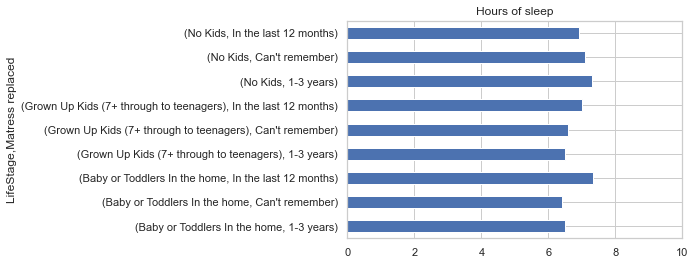

In [17]:
lifestage_sleep_quality.plot(kind="barh", xlim=(0,10), legend= False, grid=True, subplots=True)

In [18]:
# hours_map = {
#     "7 Hours": 7,
#     "Less than 6 hours": 6,
#     "8 Hours": 8,
#     "9 Hours": 9
# }

# sleep_data["How many hours of sleep do you think you get a night on average?"] = sleep_data["How many hours of sleep do you think you get a night on average?"].map(hours_map)

# type_map = {
#     "Night Owl (stay up late, wake up late)": 0",
#     "Early Bird (in bed early, up with the lark)": 1
# }

# sleep_data["What type of person are you?"] = sleep_data["What type of person are you?"].map(type_map)

# habit_map= {
#     "Go down my phone": 1,
#     "Total Silence": 2,
#     "I read": 3,
#     "I listen to the radio/podcast/music": 4
# }

# sleep_data["Just before falling asleep"] = sleep_data["Just before falling asleep"].map(habit_map)

In [19]:
factors_paired = [(i,j) for i in sleep_data.columns.values for j in sleep_data.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(sleep_data[f[0]], sleep_data[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    # for same factor pair
    else:      
        chi2.append(0)
        p_values.append(0)
        

# shape it as a matrix
chi2_test = np.array(chi2).reshape((8,8))
# turn it into a df for convenience
chi2_test = pd.DataFrame(chi2_test, index=sleep_data.columns.values, columns=sleep_data.columns.values)

In [20]:
p_values = np.array(p_values).reshape((8,8))
p_values = pd.DataFrame(p_values, index=sleep_data.columns.values, columns=sleep_data.columns.values)
p_values

,Hours of sleep,Sleep Quality,Type of person,Routine or Freestyle,Before sleeping,LifeStage,Region,Matress replaced
Hours of sleep,0.000000,0.231710,0.206697,0.946912,0.008881,0.420398,0.081058,0.072815
Sleep Quality,0.231710,0.000000,0.174168,0.242328,0.944725,0.223487,0.852582,0.249014
Type of person,0.206697,0.174168,0.000000,0.007251,0.677952,0.894486,0.655798,0.465895
Routine or Freestyle,0.946912,0.242328,0.007251,0.000000,0.210246,0.451762,0.180056,0.594183
Before sleeping,0.008881,0.944725,0.677952,0.210246,0.000000,0.781472,0.410951,0.438620
LifeStage,0.420398,0.223487,0.894486,0.451762,0.781472,0.000000,0.630743,0.750874
Region,0.081058,0.852582,0.655798,0.180056,0.410951,0.630743,0.000000,0.774688
Matress replaced,0.072815,0.249014,0.465895,0.594183,0.438620,0.750874,0.774688,0.000000


In [21]:
import numpy as np

def plot_p_values(df):    
  # create a correlation matrix only for columns with at least    
  # one missing value
    df_corr = p_values
  # create a triangular mask to avoid repeated values and make    
  # the plot easier to read    
    df_corr = p_values.iloc[1:, :-1]
    mask = np.triu(np.ones_like(df_corr), k=1)
  # plot a heatmap of the values    
    plt.figure(figsize=(20,12))
    ax = sns.heatmap(df_corr, vmin=1, vmax=0, cmap='RdBu', mask=mask, annot=True)
  # round the labels and hide labels for values near zero    
    for text in ax.texts:
        t = float(text.get_text())
#         if -0.02 < t < 0.01:      
#             text.set_text('')
#         else:
        text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')
    
    plt.show()

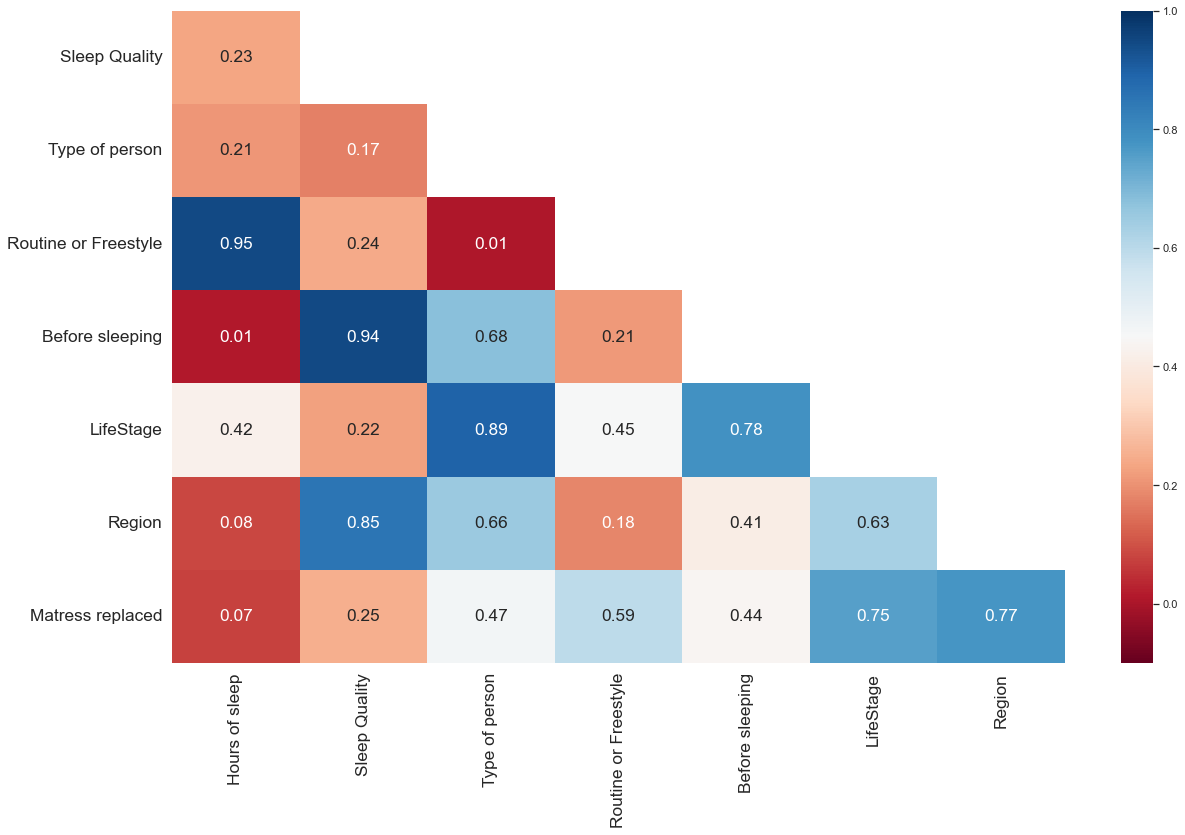

In [22]:
plot_p_values(p_values)

In [23]:
def plot_null_correlations(df):    
  # create a correlation matrix only for columns with at least    
  # one missing value
    df_corr = chi2_test
  # create a triangular mask to avoid repeated values and make    
  # the plot easier to read    
    df_corr = chi2_test.iloc[1:, :-1]
    mask = np.triu(np.ones_like(df_corr), k=1)
  # plot a heatmap of the values    
    plt.figure(figsize=(20,12))
    ax = sns.heatmap(df_corr, vmin=1, vmax=25, cmap='RdBu', mask=mask, annot=True)
  # round the labels and hide labels for values near zero    
    for text in ax.texts:
        t = float(text.get_text())
        if -0.02 < t < 0.01:      
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')
    
    plt.show()

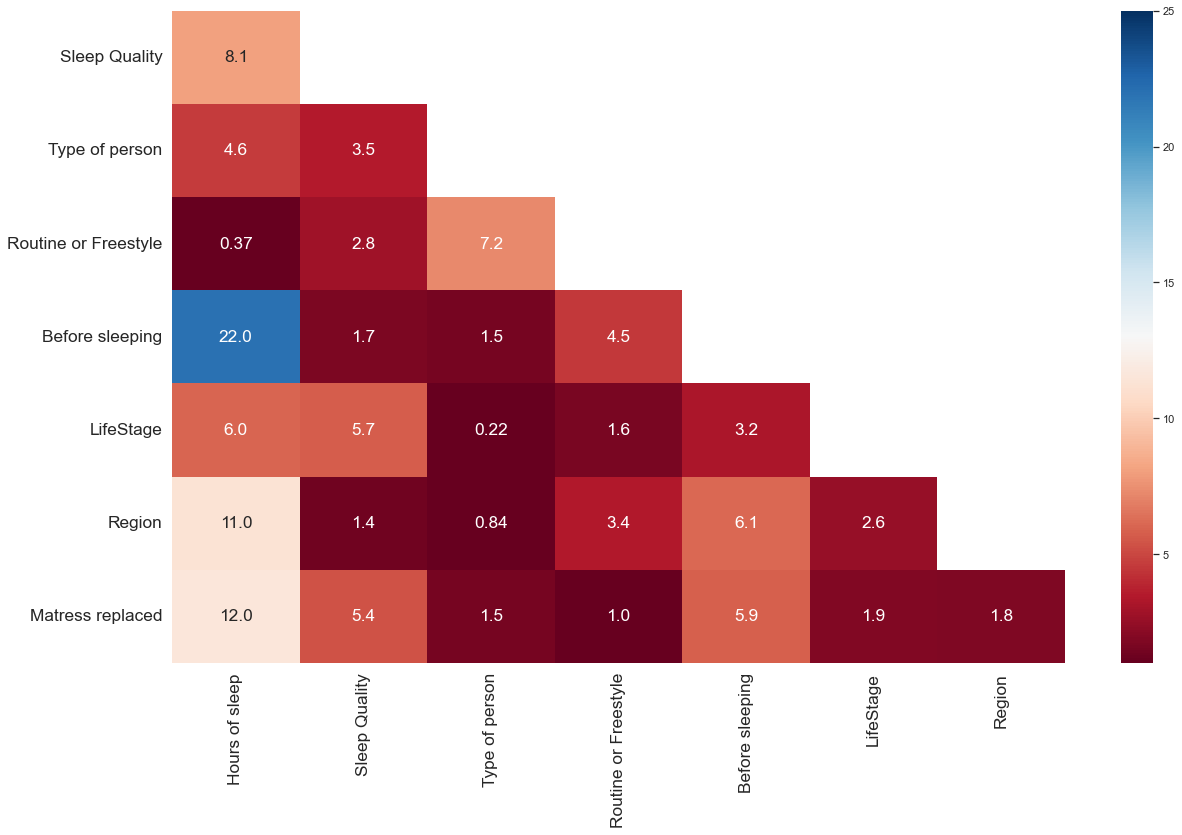

In [24]:
plot_null_correlations(chi2_test)

In [25]:
# resultant = pd.DataFrame(data=[(0 for i in range(len(sleep_data.columns))) for i in range(len(sleep_data.columns))], 
#                          columns=list(sleep_data.columns))
# resultant.set_index(pd.Index(list(sleep_data.columns)), inplace = True)

# # Finding p_value for all columns and putting them in the resultant matrix
# for i in list(sleep_data.columns):
#     for j in list(sleep_data.columns):
#         if i != j:
#             chi2_val, p_val = chi2(np.array(sleep_data(i).reshape(-1, 1), np.array(sleep_data(j).reshape(-1, 1))
#             resultant.loc[i,j] = p_val

# print(resultant)

In [26]:
# def categorise_columns(df):
#     for col in df.columns:
#         sleep_data[col] = sleep_data[col].astype("category").cat.codes
    

In [27]:
# categorise_columns(sleep_data)

In [28]:
# import numpy as np

# def plot_null_correlations(df):    
#   # create a correlation matrix only for columns with at least    
#   # one missing value
#     df_corr = df.corr()
#   # create a triangular mask to avoid repeated values and make    
#   # the plot easier to read    
#     df_corr = df_corr.iloc[1:, :-1]
#     mask = np.triu(np.ones_like(df_corr), k=1)
#   # plot a heatmap of the values    
#     plt.figure(figsize=(20,12))
#     ax = sns.heatmap(df_corr, vmin=-1, vmax=1, cmap='RdBu', mask=mask, annot=True)
#   # round the labels and hide labels for values near zero    
#     for text in ax.texts:
#         t = float(text.get_text())
#         if -0.02 < t < 0.01:      
#             text.set_text('')
#         else:
#             text.set_text(round(t, 2))
#         text.set_fontsize('x-large')
#     plt.xticks(rotation=90, size='x-large')
#     plt.yticks(rotation=0, size='x-large')
    
#     plt.show()